**kernel :**A kernel helps us find a hyperplane  in the higher dimensional space without increasing computational cost.

**Hyperplane**:This is basically a separating line between two data classes.But in SVR(Support Vector Regression)this is the line that will be used to predict continous output.

In [ ]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#make_blobs create multiclass datasets by allocating each 
#class one or more normally distributed clusters of points.
#make_blobs provides greater control regarding centers and 
#standard deviations of each cluster.

In [ ]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers

In [ ]:
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

In [ ]:
#X.shape;
#y

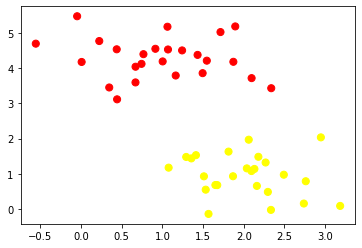

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
#s : The scalar or array like shape(n,)optional.
#the marker size in points**2
plt.show()

A Linear Discriminative classifier would attempt to draw a straightline separating two data and thereby create a model for classification.



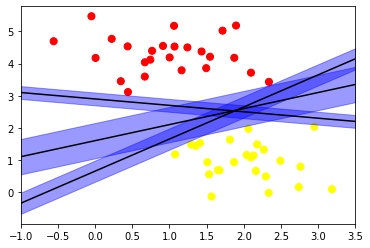

In [ ]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

for m,b,d in [(1.0,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
  yfit = m*xfit + b
  plt.plot(xfit,yfit,'k') #Line Plot
  plt.fill_between(xfit,yfit-d,yfit+d,color='b',alpha = 0.4)
  #fill the area between two horizintal curves.
plt.xlim(-1,3.5)
plt.show()

As we know,Support Vector Machine always looks for 2 things:
-->Setting a larger margin 
-->Lowering Misclassification

Support Vector Machine looks for higher margin as lower misclassification on training dataset doesn't mean lower classification on validation/testing data.

Parameter "C" regularization parameter that controls the tradeoff between achieving a lower training error and a low testing error.

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel="linear",C=1)
model.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#plot the decision function.
def plot_svc_decision_function(model,ax=None,plot_support=True):
  #plot the decision function for 2D SVC
  if ax is None:
    ax = plt.gca() #gca ->get current axis
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  #create a grid to evaluate the model
  x = np.linspace(xlim[0],xlim[1],30)
  y = np.linspace(ylim[0],ylim[1],30)
  Y,X = np.meshgrid(y,x)
  xy = np.vstack([X.ravel(),Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)
  #plot the decision boundary and margins
  ax.contour(X,Y,P,colors = 'k',levels=[-1,0,1],alpha = 0.5,
             linestyles=['--','-','--'])
  #plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],
               s = 300,linewidth = 5)
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

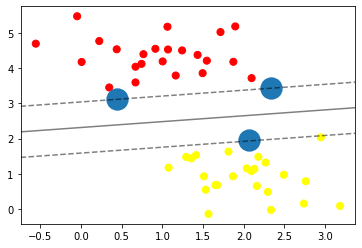

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn")
plot_svc_decision_function(model)